In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import sys
import os

# Add the parent directory to sys.path
sys.path.append(os.path.abspath(os.path.join('..')))

# Now import preprocess_data from scripts.preprocess
from scripts.preprocess import preprocess_data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv(r"C:\Users\pavel\Downloads\real_estate_prague.csv")

dataset = preprocess_data(data = df)
print(dataset.shape)

dataset_sale = dataset[dataset['Sale_or_Rent'] == 'Sale'].reset_index(drop=True)
dataset_rent = dataset[dataset['Sale_or_Rent'] == 'Rent'].reset_index(drop=True)

Zero-price flats have been removed.
Column 'Prague_district' has 38 missing values so we remove them.
There is 36 of new advertisements of flats in Prague.
(7064, 9)


In [3]:
dataset_sale.head()

,ID,Price (CZK),Latitude,Longitude,Flat Type,Is New,Size_m2,Prague_district,Sale_or_Rent
0,581571148,9107000,50.059996,14.421415,2,False,44,5,Sale
1,1682027084,2604000,50.101160,14.498153,2,False,62,9,Sale
2,1399710284,8846000,50.048689,14.416742,2,False,46,5,Sale
3,3846582860,6058000,49.986261,14.432708,2,False,40,4,Sale
4,1240003148,6501000,50.074152,14.574597,2,False,45,9,Sale


In [5]:
X = dataset_sale[['Size_m2', 'Latitude', 'Longitude', 'Flat Type']] 
y = dataset_sale['Price (CZK)']

# Convert categorical variables to numerical (if needed)
X = pd.get_dummies(X, drop_first = True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train.head()

,Size_m2,Latitude,Longitude,Flat Type
1583,63,50.095953,14.538469,4
2678,109,50.092074,14.485200,6
1937,79,50.048231,14.416551,5
209,52,50.004080,14.414339,2
3371,186,50.091208,14.449268,8


In [7]:
# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

predictions_lr = model_lr.predict(X_test)

# Random Forest
model_rf = RandomForestRegressor(n_estimators = 1000,
                                 random_state = 42,
                                 max_depth = 10,
                                 min_samples_split = 5)
model_rf.fit(X_train, y_train)

predictions_rf = model_rf.predict(X_test)

In [8]:
r2_lr = r2_score(y_test, predictions_lr)
r2_rf = r2_score(y_test, predictions_rf)

# Calculate evaluation metrics
mae_lr = mean_absolute_error(y_test, predictions_lr)
mae_rf = mean_absolute_error(y_test, predictions_rf)

mse_lr = mean_squared_error(y_test, predictions_lr)
mse_rf = mean_squared_error(y_test, predictions_rf)

rmse_lr = np.sqrt(mse_lr)
rmse_rf = np.sqrt(mse_rf)

r2_lr = r2_score(y_test, predictions_lr)
r2_rf = r2_score(y_test, predictions_rf)

print(f" Model Evaluation Results Linear Regression:")
print(f" Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f" Mean Squared Error (MSE): {mse_lr:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f" R² Score: {r2_lr:.4f}")

print(f" Model Evaluation Results Random Forest:")
print(f" Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f" Mean Squared Error (MSE): {mse_rf:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f" R² Score: {r2_rf:.4f}")



 Model Evaluation Results Linear Regression:
 Mean Absolute Error (MAE): 2978220.51
 Mean Squared Error (MSE): 30371215610324.70
 Root Mean Squared Error (RMSE): 5511008.58
 R² Score: 0.6421
 Model Evaluation Results Random Forest:
 Mean Absolute Error (MAE): 2505590.83
 Mean Squared Error (MSE): 22769860530037.24
 Root Mean Squared Error (RMSE): 4771777.50
 R² Score: 0.7317


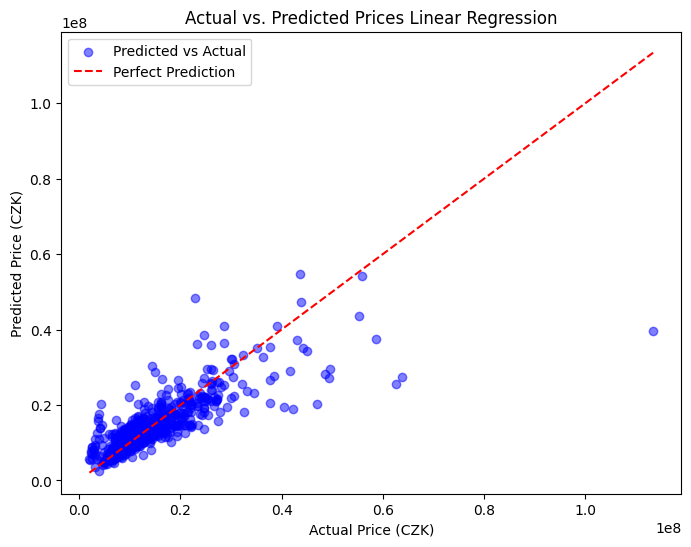

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_lr, alpha=0.5, color="blue", label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Price (CZK)")
plt.ylabel("Predicted Price (CZK)")
plt.title("Actual vs. Predicted Prices Linear Regression")
plt.legend()
plt.show()


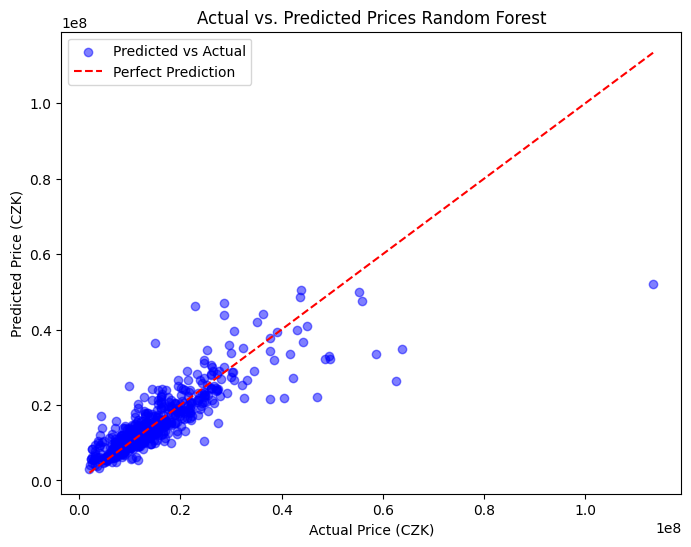

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_rf, alpha=0.5, color="blue", label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Price (CZK)")
plt.ylabel("Predicted Price (CZK)")
plt.title("Actual vs. Predicted Prices Random Forest")
plt.legend()
plt.show()